In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data =pd.read_csv("IMDB Dataset.csv")

In [3]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [13]:
# import pandas as pd
# import re

# # Example: Efficient Cleaning Function
# def clean_review_vectorized(df):
#     df['clean_review'] = (
#         df['review']  # Assuming 'review' is the column with text
#         .str.lower()
#         .str.replace(r'<.*?>', '', regex=True)  # Remove HTML tags
#         .str.replace(r'[^a-z\s]', '', regex=True)  # Remove non-alphabet characters
#         .str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
#         .str.strip()
#     )
#     return df
import re

def clean_review(text):
    """
    Cleans a single review by removing HTML, non-alphabet characters, and extra spaces.
    """
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabet characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()


In [14]:
data['review'] =data['review'].apply(clean_review)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv =TfidfVectorizer(max_features=2500)
reviews =cv.fit_transform(data['review']).toarray()


In [18]:
data['sentiment'] =data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\muzam\AppData\Local\Temp\ipykernel_14052\3982442181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] =data['sentiment'].replace(['positive','negative'],[1,0])


In [19]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [28]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [30]:
predict = model.predict(reviews_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(predict,sent_test)
print(accuracy)

0.8768


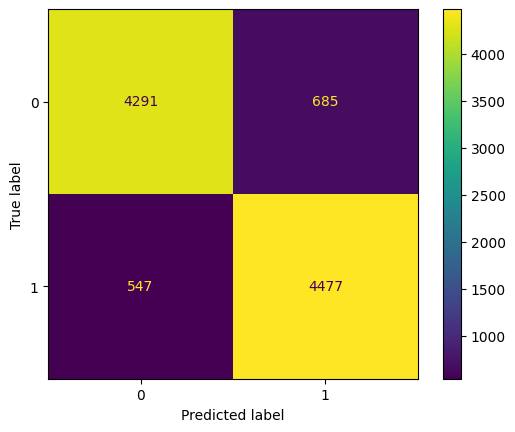

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_) 
display.plot()
plt.show()  

In [32]:
import pickle as pk

In [33]:
pk.dump(model,open('model.pkl','wb'))

In [35]:
pk.dump(cv,open('scaler.pkl','wb'))